In [3]:
data_train_path='data/train'
data_test_path='data/test'
data_val_path='data/validation'

In [4]:
img_width=180
img_height=180


In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 2338 files belonging to 7 classes.


In [36]:
data_cat= data_train.class_names
data_cat

['battery', 'cardboard', 'food_waste', 'glass', 'metal', 'paper', 'plastic']

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 247 files belonging to 7 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 595 files belonging to 7 classes.


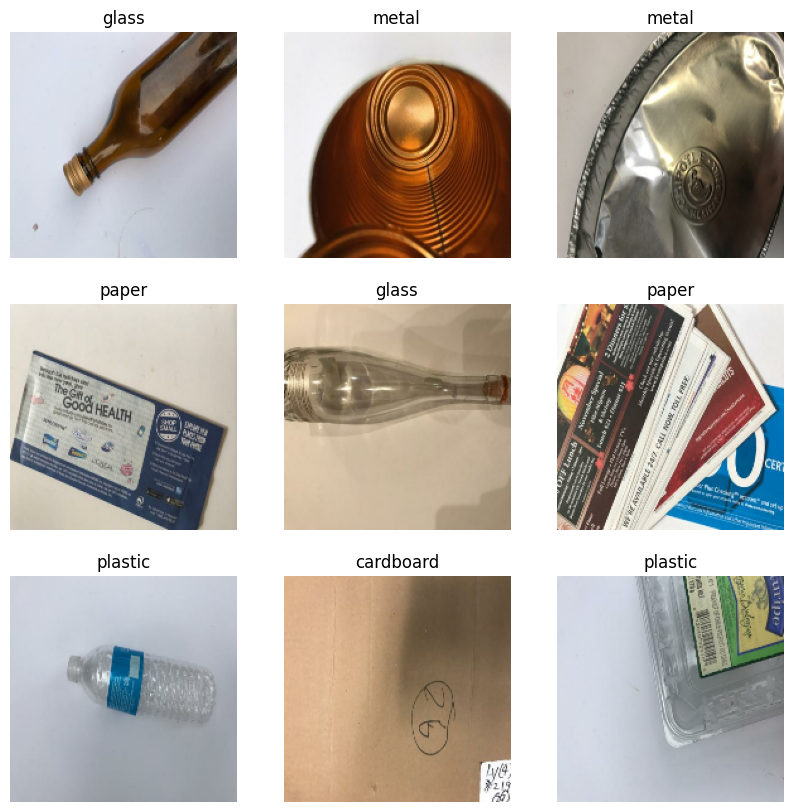

In [9]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
    
])

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.2475 - loss: 2.1366 - val_accuracy: 0.3684 - val_loss: 1.7404
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 237ms/step - accuracy: 0.5514 - loss: 1.2475 - val_accuracy: 0.5020 - val_loss: 1.6449
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step - accuracy: 0.6161 - loss: 1.0579 - val_accuracy: 0.4737 - val_loss: 1.7841
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 261ms/step - accuracy: 0.6812 - loss: 0.8518 - val_accuracy: 0.4737 - val_loss: 2.1600
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.7660 - loss: 0.6561 - val_accuracy: 0.5749 - val_loss: 1.8688
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.7899 - loss: 0.5550 - val_accuracy: 0.5951 - val_loss: 1.7308
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - accuracy: 0.8616 - loss: 0.4103 - val_accuracy: 0.5344 - val_loss: 2.3260
Epoch 8/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.8087 - loss: 0.5708 - val_accu

Text(0.5, 1.0, 'Loss')

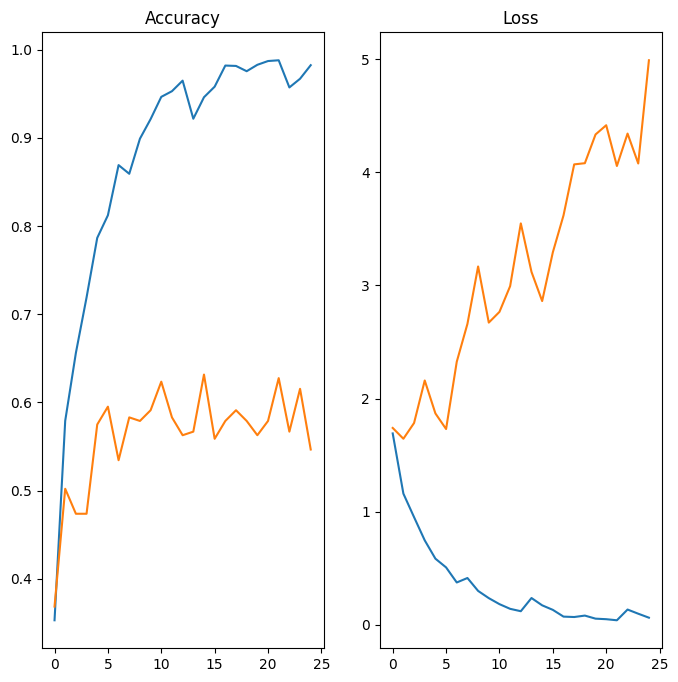

In [23]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [28]:
image='data/train/glass/glass101.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [29]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [30]:
score =tf.nn.softmax(predict)

In [31]:
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

image is glass with accuracy of 99.99


In [32]:
model.save('Image_classifier.keras')